In [1]:
import datetime

from common.path import *
from common.data_processing import *

In [2]:
raw = pd.read_csv(RAW_DATA_DIR / 'INFLUD-02-08-2021.csv', delimiter=';', encoding='iso-8859-1', dayfirst=True, parse_dates=['DT_NASC'], usecols=['CS_SEXO', 'CO_MUN_NOT', 'DT_NASC', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE','FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', ])

In [3]:
processed = new_blank_dataframe(len(raw))

processed['cad_dt_nascimento'] = raw['DT_NASC']
unoptimzed_n_way_column_map(raw['CS_SEXO'], processed['cad_sexo'], ['F','M'], [1,0])
n_way_column_filter(raw['CO_MUN_NOT'], processed['cad_cod_cidade'], lambda x: x<=0, 0)

n_way_column_map(raw['ASMA'], processed['fr_asma'], [1,2], [1,0])
n_way_column_map(raw['CARDIOPATI'], processed['fr_cardiopatia'], [1,2], [1,0])
n_way_column_map(raw['DIABETES'], processed['fr_diabetes'], [1,2], [1,0])
n_way_column_map(raw['RENAL'], processed['fr_doenca_renal'], [1,2], [1,0])
n_way_column_map(raw['HEMATOLOGI'], processed['fr_hematologia'], [1,2], [1,0])
n_way_column_map(raw['HEPATICA'], processed['fr_hepatia'], [1,2], [1,0])
n_way_column_map(raw['IMUNODEPRE'], processed['fr_imunodepressao'], [1,2], [1,0])
n_way_column_map(raw['NEUROLOGIC'], processed['fr_neuropatia'], [1,2], [1,0])
n_way_column_map(raw['OBESIDADE'], processed['fr_obesidade'], [1,2], [1,0])
n_way_column_map(raw['PNEUMOPATI'], processed['fr_pneumopatia'], [1,2], [1,0])
n_way_column_map(raw['PUERPERA'], processed['fr_puerpera'], [1,2], [1,0])
n_way_column_map(raw['SIND_DOWN'], processed['fr_snd_down'], [1,2], [1,0])

n_way_column_map(raw['DESC_RESP'], processed['sint_dfc_respiratorio'], [1,2], [1,0])
n_way_column_map(raw['DIARREIA'], processed['sint_diarreia'], [1,2], [1,0])
n_way_column_map(raw['DISPNEIA'], processed['sint_dispneia'], [1,2], [1,0])
n_way_column_map(raw['DOR_ABD'], processed['sint_dor_abdominal'], [1,2], [1,0])
n_way_column_map(raw['GARGANTA'], processed['sint_dor_garganta'], [1,2], [1,0])
n_way_column_map(raw['FADIGA'], processed['sint_fadiga'], [1,2], [1,0])
n_way_column_map(raw['FEBRE'], processed['sint_febre'], [1,2], [1,0])
n_way_column_map(raw['PERD_OLFT'], processed['sint_prd_olfato'], [1,2], [1,0])
n_way_column_map(raw['PERD_PALA'], processed['sint_prd_paladar'], [1,2], [1,0])
n_way_column_map(raw['SATURACAO'], processed['sint_saturacao'], [1,2], [1,0])
n_way_column_map(raw['TOSSE'], processed['sint_tosse'], [1,2], [1,0])
n_way_column_map(raw['VOMITO'], processed['sint_vomito'], [1,2], [1,0])

In [4]:
len(processed.dropna())/len(processed)

0.21922163429739644

In [7]:
processed.dropna().sample(10)

,cad_dt_nascimento,cad_cod_cidade,cad_sexo,fr_asma,fr_cardiopatia,fr_diabetes,fr_doenca_renal,fr_hematologia,fr_hepatia,fr_imunodepressao,...,sint_dispneia,sint_dor_abdominal,sint_dor_garganta,sint_fadiga,sint_febre,sint_prd_olfato,sint_prd_paladar,sint_saturacao,sint_tosse,sint_vomito
1180372,1952-03-15,355030,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
829155,1952-05-13,315120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
336002,2014-09-27,292740,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
918663,1962-03-26,350860,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
69383,1956-04-12,310620,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
957394,1942-04-14,351550,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
659241,1966-11-10,352090,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1067759,1951-04-25,316210,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1072515,1955-03-02,330185,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
699945,1936-12-14,260790,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


<AxesSubplot:>

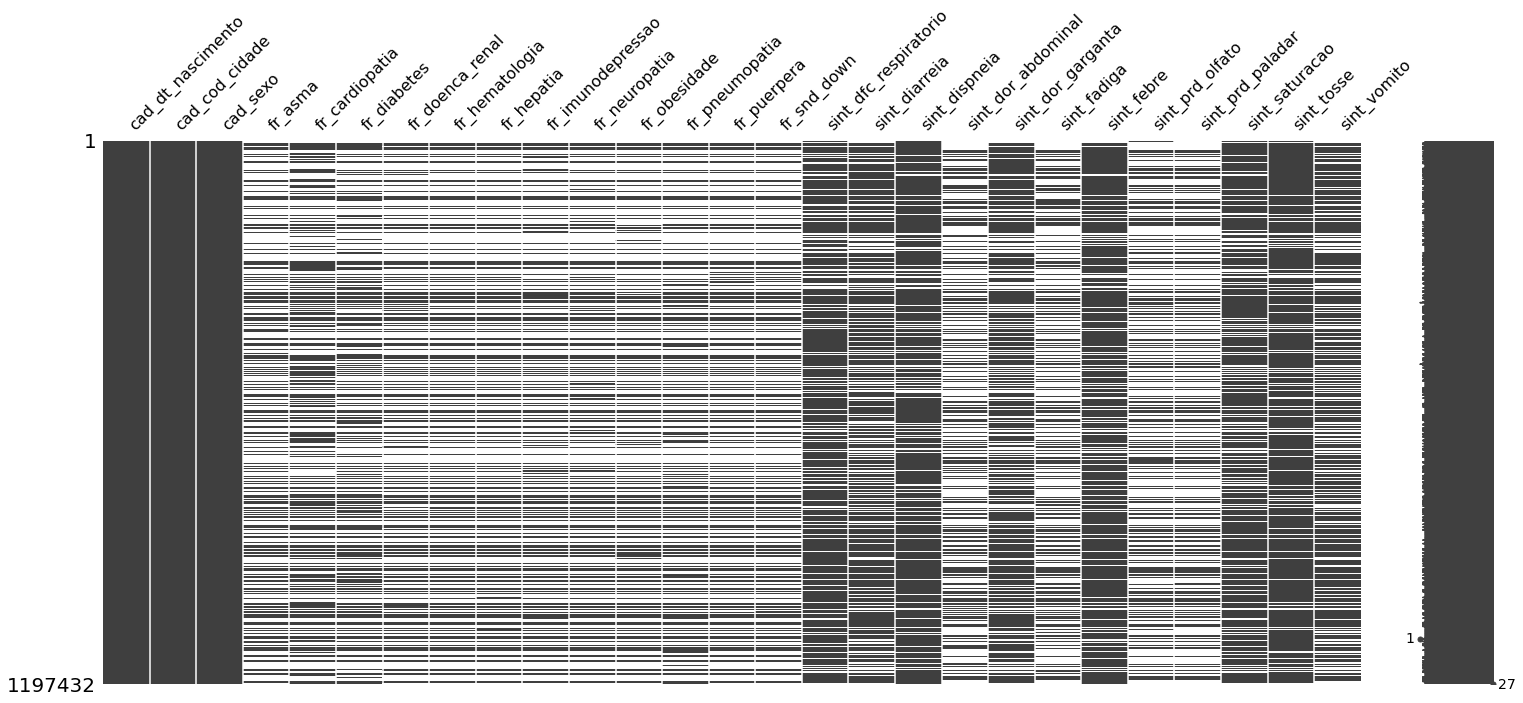

In [5]:
import missingno as msno

msno.matrix(processed)

In [6]:
processed.to_parquet(PROCESSED_DATA_DIR / f'srag_2021_{str(datetime.datetime.utcnow()).replace(" ", "_").replace(":","-")}.parquet')